In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
nuclear = sio.loadmat('/Users/Abithasrinivas/Downloads/nuclear.mat')
X = nuclear['x']
X = np.concatenate((np.ones((1,20000)), X), axis = 0)
Y = nuclear['y']
lamb = 0.001

Text(0.5,1,'Cost vs Iteration')

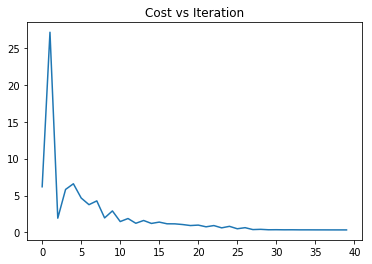

In [5]:
def Loss(theta, x , y):
    z = np.matmul(np.transpose(theta),x)
    test = np.concatenate ((np.zeros((1,x.shape[1])), (1-y*z)) , axis = 0)
    return (np.amax(test,axis = 0 , keepdims = True))

def J(r, x,y, lamb):
        Jj = Loss(theta, x, y)
        n = x.shape[1]
        Jj= np.sum(Jj , axis=1)/n + lamb/2 * (np.linalg.norm(theta[1:theta.shape[0],:])**2)
        return(Jj)
        
def sub(theta, x, y , lamb):
    z = np.matmul(np.transpose(theta),x)
    mask = 1*(y*z<1)
    u = -1*mask*y*x/x.shape[1]
    u = np.sum(u , axis=1, keepdims = True) + lamb * np.append([[0]],theta[1:theta.shape[0],0:1], axis = 0)
    return u

theta = np.array([[0],[0],[0]])
g =sub(theta, X, Y, lamb)

Jnew = np.zeros((40, 1))
for i in range(40):
    u = sub(theta, X, Y, lamb)
    alpha = 100/(i+1)
    theta = theta - alpha * u 
    Jnew[i] = J(theta, X,Y,lamb)

plt.plot(Jnew)
plt.title('Cost vs Iteration')


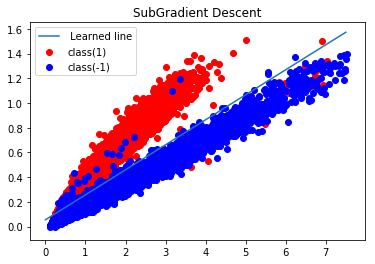

In [6]:
x1 = X[:,np.ndarray.flatten(Y==1)]
x0 = X[:,np.ndarray.flatten(Y==-1)]
plt.scatter(x1[1,:] , x1[2,:],c ='r', label = 'class(1)')
plt.scatter(x0[1,:] , x0[2,:],c ='b', label = 'class(-1)')
linx = np.arange(0,np.max(X),0.1)
plt.plot(linx,((-1*theta[0,0] - theta[1,0]*linx)/theta[2,0]), label = ' Learned line')
legend = plt.legend(loc = 'best')
plt.title('SubGradient Descent')
plt.show()

In [7]:
print ('b:\n', theta[0,:])
print ('\nw:\n', theta[1:3, :])
print ('\nSmallest J value :\n', min(Jnew))

b:
 [-1.01948385]

w:
 [[-3.73267405]
 [18.45444302]]

Smallest J value :
 [0.34954643]


In [8]:
def sub2(theta, xs, ys , lamb, n):
    zs = np.matmul(np.transpose(theta),xs)
    mask = 1*(ys*zs<1)
    us = np.reshape(-1*mask*ys*xs,(3,1))
    us = (us + lamb * np.append([[0]],theta[1:theta.shape[0],0:1], axis = 0))/n
    return us

In [10]:
n = X.shape[1]
np.random.seed(0)
theta = np.array([[0],[0],[0]])
iterations = 30
Theta = np.zeros ((iterations*n,1))

In [11]:
for i in range(iterations):
    index = np.random.permutation(np.arange(0,n))
    alpha = 100/(i+1)
    q = 0
    for l in index:
        x1 = X[:,l]
        y1 = Y[:,l]
        us = sub2(theta, x1,y1,lamb, n)
        theta = theta - alpha *us
        Theta[i*n+q] = J(theta, X,Y,lamb)
        q+=1

Text(0.5,1,'Cost vs Iteration')

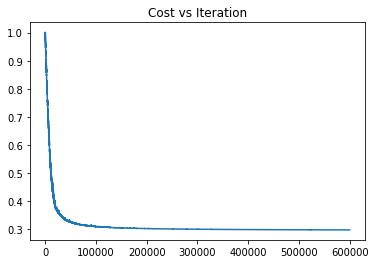

In [12]:
plt.plot(Theta)
plt.title('Cost vs Iteration')

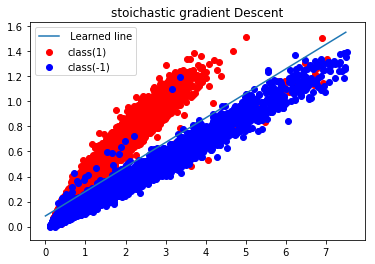

In [13]:
x1 = X[:,np.ndarray.flatten(Y==1)]
x0 = X[:,np.ndarray.flatten(Y==-1)]
plt.scatter(x1[1,:] , x1[2,:],c ='r', label = 'class(1)')
plt.scatter(x0[1,:] , x0[2,:],c ='b', label = 'class(-1)')
linx = np.arange(0,np.max(X),0.1)
plt.plot(linx,((-1*theta[0,0] - theta[1,0]*linx)/theta[2,0]), label = ' Learned line')
legend = plt.legend(loc = 'best')
plt.title('stoichastic gradient Descent')
plt.show()

In [14]:
print ('b:\n', theta[0,:])
print ('\nw:\n', theta[1:3, :])
print ('\nSmallest J value :\n', min(Theta))

b:
 [-0.94840652]

w:
 [[-2.18505349]
 [11.16657658]]

Smallest J value :
 [0.29632254]
